In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Advertising.csv')
df

: 

Text(0, 0.5, 'Sales')

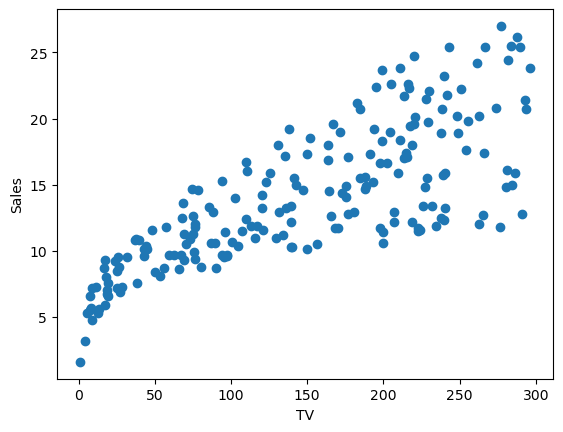

In [124]:
#assign features to variables and plot
import matplotlib.pyplot as plt

tv = df['TV']
radio = df['radio']
newspaper = df['newspaper']
sales = df['sales']

plt.scatter(tv, sales)
plt.xlabel('TV')
plt.ylabel('Sales')
 



In [125]:
#convert to numpy and check the number of elements in each feature
tv_np = tv.to_numpy()
radio_np = radio.to_numpy()
newspaper_np = newspaper.to_numpy()
sales_np = sales.to_numpy()

tv_np.shape, radio_np.shape, newspaper_np.shape, sales_np.shape

((200,), (200,), (200,), (200,))

In [126]:
#combine into data set for training
x_train = np.c_[tv_np, radio_np, newspaper_np]

y_train = sales_np

x_train.shape


(200, 3)

In [127]:
print(f'X: rows: {x_train.shape[0]}, columns: {x_train.shape[1]}')
print(f'Y: {y_train.shape[0]}')


X: rows: 200, columns: 3
Y: 200


In [128]:
#assign initial values to parameters w and b
b_init = 34
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453], dtype=float)
print(f"initial shape of w: {w_init.shape}, initial type of b: {type(b_init)}")


initial shape of w: (3,), initial type of b: <class 'int'>


In [129]:
#predict a y_hat given features
def predict_single_loop(x, w_hat, b_hat):
    y_hat = np.dot(x, w_hat) + b_hat
    return y_hat

In [130]:
# x_train[0, :]: get the first row from the training data
# fw_b: the prediction (y_hat)
fw_b = predict_single_loop(x_train[0, :], w_init, b_init)


In [131]:
def partial_derivative(x, w, b, y): 
    # w: w1, w2, w3..., w_p
    m, n = x.shape
    dj_dw = np.zeros((n))
    dj_db =  0
    for i in range(m):
        error = np.dot(x[i], w) + b - y[i]
        dj_db += error
        for j in range(n):
            dj_dw[j] += error * x[i, j]
        
        
#     for i in range(w.shape[0]):
#         for j in range(m):
#             dj_dw[i] += (np.dot(x[j], w) - y[j]) * x[j, i]
#             dj_db += np.dot(x[j], w) - y[j]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db 



In [132]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range (m):
        cost += (np.dot(w, x[i]) + b - y[i]) ** 2
    cost /= (2 * m)
    return cost

In [139]:
def gradient_descent(w, b, x, y):
    alpha = 6.0e-5
    i = 0
    
    while compute_cost(x, y, w, b) > 1.4:
#     for i in range(250000):
        i += 1
        dj_dw, dj_db = partial_derivative(x, w, b, y)
        w -= alpha * dj_dw 
        b -= alpha * dj_db
        if i % 1000 == 0:
            print(f"Iteration {i}: {compute_cost(x, y, w, b)}")
    
    print(f"Iteration {i}: {compute_cost(x, y, w, b)}")
    return w, b

w_final, b_final = gradient_descent(w_init, b_init, x_train, y_train)
print(f'{w_final}, {b_final}')
   

Iteration 1000: 70.57882667055623
Iteration 2000: 69.3773633568804
Iteration 3000: 68.19676406483201
Iteration 4000: 67.03666647953902
Iteration 5000: 65.89671457844365
Iteration 6000: 64.77655852150168
Iteration 7000: 63.67585454381603
Iteration 8000: 62.594264850144285
Iteration 9000: 61.53145751123045
Iteration 10000: 60.487106361937215
Iteration 11000: 59.46089090115142
Iteration 12000: 58.45249619342442
Iteration 13000: 57.46161277232211
Iteration 14000: 56.48793654545192
Iteration 15000: 55.5311687011398
Iteration 16000: 54.59101561672949
Iteration 17000: 53.6671887684703
Iteration 18000: 52.75940464297378
Iteration 19000: 51.86738465020534
Iteration 20000: 50.99085503798752
Iteration 21000: 50.12954680798903
Iteration 22000: 49.283195633171474
Iteration 23000: 48.451541776669316
Iteration 24000: 47.634330012080184
Iteration 25000: 46.83130954513794
Iteration 26000: 46.04223393674565
Iteration 27000: 45.266861027347204
Iteration 28000: 44.50495286261018
Iteration 29000: 43.756275

Iteration 230000: 2.6446043417164726
Iteration 231000: 2.6228533274340524
Iteration 232000: 2.6014800305697854
Iteration 233000: 2.580477891868718
Iteration 234000: 2.559840465980709
Iteration 235000: 2.5395614194823724
Iteration 236000: 2.519634528933482
Iteration 237000: 2.5000536789669634
Iteration 238000: 2.4808128604122515
Iteration 239000: 2.4619061684510384
Iteration 240000: 2.4433278008052155
Iteration 241000: 2.4250720559561674
Iteration 242000: 2.407133331395054
Iteration 243000: 2.389506121903447
Iteration 244000: 2.372185017863828
Iteration 245000: 2.355164703599448
Iteration 246000: 2.338439955742986
Iteration 247000: 2.322005641633544
Iteration 248000: 2.3058567177414875
Iteration 249000: 2.2899882281206363
Iteration 250000: 2.2743953028873425
Iteration 251000: 2.259073156725945
Iteration 252000: 2.2440170874202567
Iteration 253000: 2.229222474410429
Iteration 254000: 2.214684777375002
Iteration 255000: 2.200399534837496
Iteration 256000: 2.1863623627972473
Iteration 2570

Iteration 454000: 1.4168146269919537
Iteration 455000: 1.4163848051398455
Iteration 456000: 1.4159624473626582
Iteration 457000: 1.4155474240429373
Iteration 458000: 1.4151396078141034
Iteration 459000: 1.414738873521359
Iteration 460000: 1.414345098183284
Iteration 461000: 1.413958160954096
Iteration 462000: 1.4135779430865532
Iteration 463000: 1.413204327895533
Iteration 464000: 1.412837200722197
Iteration 465000: 1.4124764488988182
Iteration 466000: 1.4121219617142113
Iteration 467000: 1.4117736303797335
Iteration 468000: 1.411431347995924
Iteration 469000: 1.4110950095196744
Iteration 470000: 1.4107645117320127
Iteration 471000: 1.4104397532064112
Iteration 472000: 1.41012063427767
Iteration 473000: 1.40980705701132
Iteration 474000: 1.409498925173579
Iteration 475000: 1.4091961442018088
Iteration 476000: 1.4088986211755061
Iteration 477000: 1.4086062647877748
Iteration 478000: 1.4083189853173055
Iteration 479000: 1.4080366946008558
Iteration 480000: 1.4077593060061733
Iteration 48

In [155]:
tv_in = float(input('TV budget:'))
radio_in = float(input('Radio budget:'))
newspaper_in = float(input('Newspaper budget:'))
x_test = np.c_[tv_in, radio_in, newspaper_in]
print(x_test)
print(f"Sales predicted: {float(predict_single_loop(x_test, w_final, b_final))}")


TV budget:434
Radio budget:200
Newspaper budget:34
[[434. 200.  34.]]
Sales predicted: 59.58582848600981


##### 

In [135]:

97.5	7.6	7.2	9.7
281.4	39.6	55.8	24.4
218.4	27.7	53.4	18
97.2	1.5	30	9.6
18.7	12.1	23.4	6.7
283.6	42	66.2	25.5
0.7	39.6	8.7	1.6

[ 0.04486421  0.18474758 -0.00304023], 3.2686110695713566


fw_b = w_hat * x + b_hat

w_hat
w1 = 0.04486421
w2 = 0.18474758
w3 = -0.00304023

b_hat
b = 3.2686110695713566


SyntaxError: invalid syntax (3301272636.py, line 1)